In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
dataframe = pd.read_csv("voice.csv")

In [3]:
dataframe.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
dataframe.label = [1 if(each == 'male') else 0 for each in dataframe.label] #1:Male 0: Female
y = dataframe.label.values
x_data = dataframe.drop(["label"],axis=1) 
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values #Normalization

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train = x_train.T
x_test  = x_test.T
y_train = y_train.T
y_test  = y_test.T

In [6]:
def init_weights_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [7]:
def forward_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]    
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

In [8]:
def update_weights_bias(w,b,x_train,y_train,learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients["derivative_weight"] 
        b = b - learning_rate * gradients["derivative_bias"]   
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [9]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.695733
Cost after iteration 10: 0.570587
Cost after iteration 20: 0.511070
Cost after iteration 30: 0.472310
Cost after iteration 40: 0.442741
Cost after iteration 50: 0.418369
Cost after iteration 60: 0.397485
Cost after iteration 70: 0.379209
Cost after iteration 80: 0.363009
Cost after iteration 90: 0.348522
Cost after iteration 100: 0.335479
Cost after iteration 110: 0.323672
Cost after iteration 120: 0.312932
Cost after iteration 130: 0.303120
Cost after iteration 140: 0.294122
Cost after iteration 150: 0.285840
Cost after iteration 160: 0.278192
Cost after iteration 170: 0.271109
Cost after iteration 180: 0.264530
Cost after iteration 190: 0.258403
Cost after iteration 200: 0.252683
Cost after iteration 210: 0.247332
Cost after iteration 220: 0.242314
Cost after iteration 230: 0.237600
Cost after iteration 240: 0.233163
Cost after iteration 250: 0.228979
Cost after iteration 260: 0.225027
Cost after iteration 270: 0.221289
Cost after iteration 280: 0.217

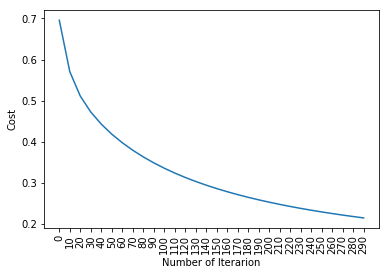

test accuracy: 97.1608832807571 %


In [10]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w, b = init_weights_bias(dimension)

    parameters,gradients,cost_list = update_weights_bias(w,b,x_train,y_train,learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return y_prediction_test #Estimates for Complex Matrix
    
y_predict = logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, num_iterations=300)

In [11]:
predict = []
for i in range(0,1):
    for each in y_predict[i]:
        predict.append(int(each))

In [12]:
truePredict = 0
falsePredict = 0
for p in range(len(predict)):
    for y in range(p,len(y_test)):
        if (predict[p] == y_test[y]):
            truePredict = truePredict +1
            break
        else:
            falsePredict = falsePredict +1
            break
print("True Predict: ",truePredict)
print("False Predict",falsePredict)
print("-------------------------------------------------------------------------------------")
print("Predict: ",predict)
print("-------------------------------------------------------------------------------------")
print("y_test: ",y_test)

True Predict:  616
False Predict 18
-------------------------------------------------------------------------------------
Predict:  [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 

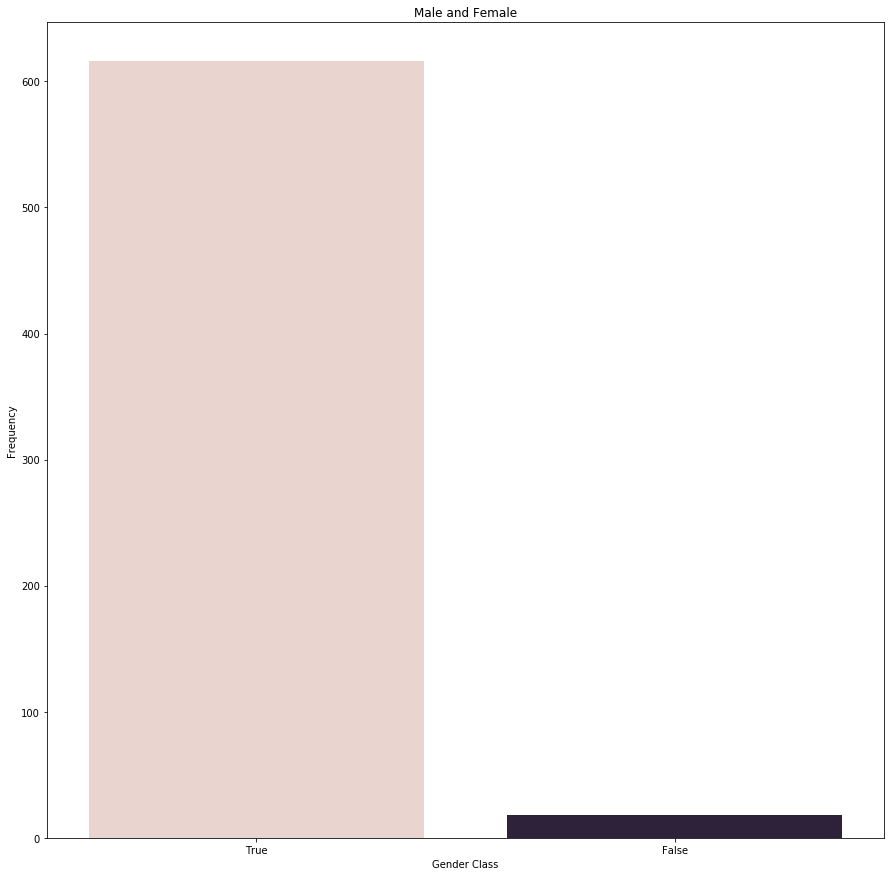

In [13]:
x_Axis = ["True","False"]
y_Axis = [truePredict,falsePredict]

plt.figure(figsize=(15,15))
sns.barplot(x=x_Axis,y=y_Axis,palette = sns.cubehelix_palette(len(x_Axis)))
plt.xlabel("Gender Class")
plt.ylabel("Frequency")
plt.title("Male and Female")
plt.show()

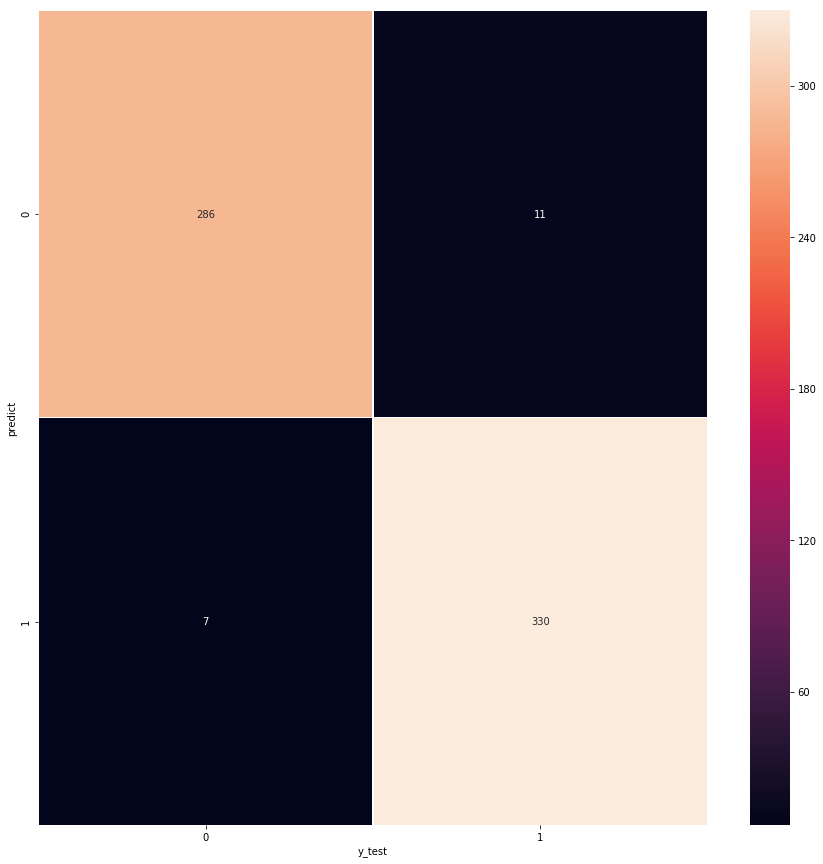

In [14]:
conf_matrix = confusion_matrix(y_test,predict)
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_matrix,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("predict")
plt.show()